In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = ['Sepal Length', 'Sepal Width',
           'Petal Length', 'Petal Width', 'Class Name']

data = pd.read_csv('iris.data', names=columns)


In [4]:
data


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<Axes: title={'center': 'Sepal Length'}>,
        <Axes: title={'center': 'Sepal Width'}>],
       [<Axes: title={'center': 'Petal Length'}>,
        <Axes: title={'center': 'Petal Width'}>]], dtype=object)

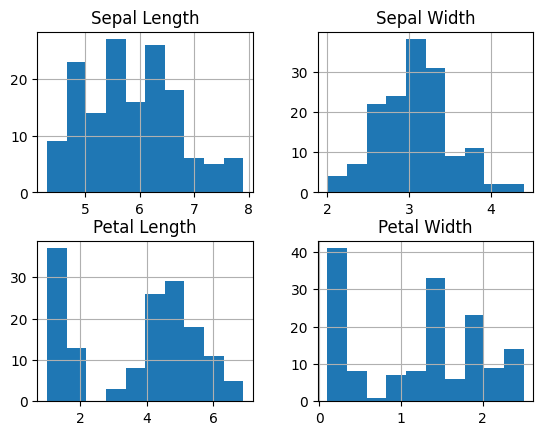

In [5]:
data.hist()

In [6]:
data.describe()


,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


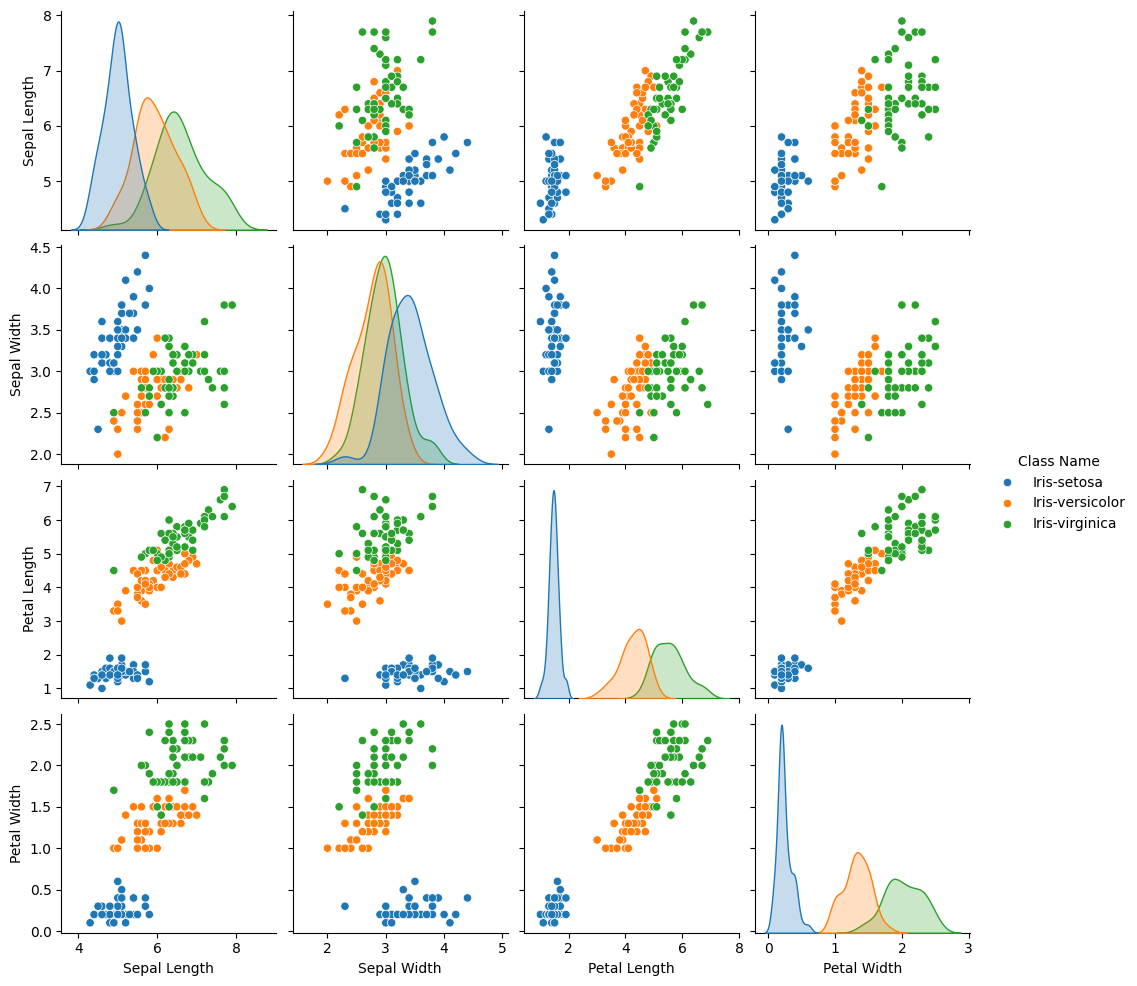

In [7]:
sb.pairplot(data, hue='Class Name')


In [8]:
data.isnull()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class Name
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
data.isnull().sum()


Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class Name      0
dtype: int64

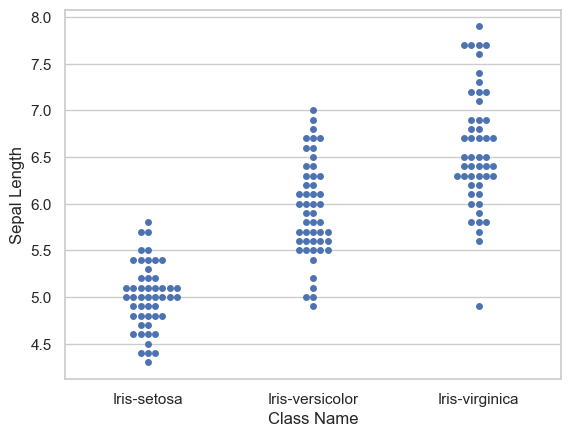

In [10]:
#  swarmplot
sb.set(style="whitegrid", color_codes=True)
ax = sb.swarmplot(x="Class Name", y="Sepal Length", data=data)
plt.show()

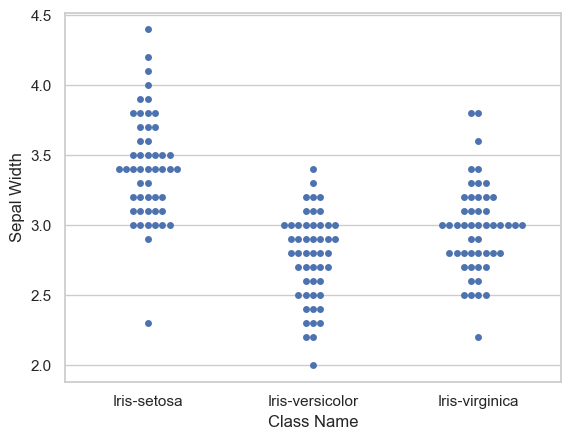

In [11]:
#  swarmplot
sb.set(style="whitegrid", color_codes=True)
ax = sb.swarmplot(x="Class Name", y="Sepal Width", data=data)
plt.show()

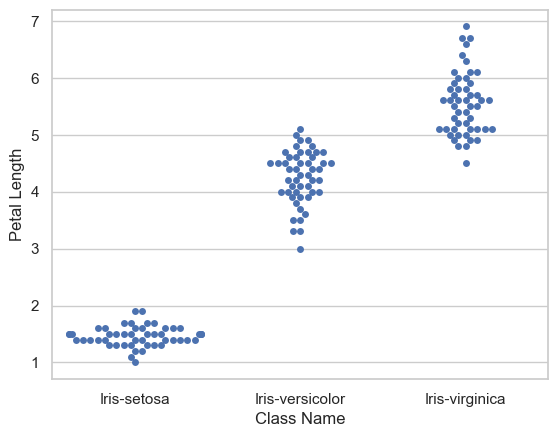

In [12]:
#  swarmplot
sb.set(style="whitegrid", color_codes=True)
ax = sb.swarmplot(x="Class Name", y="Petal Length", data=data)
plt.show()

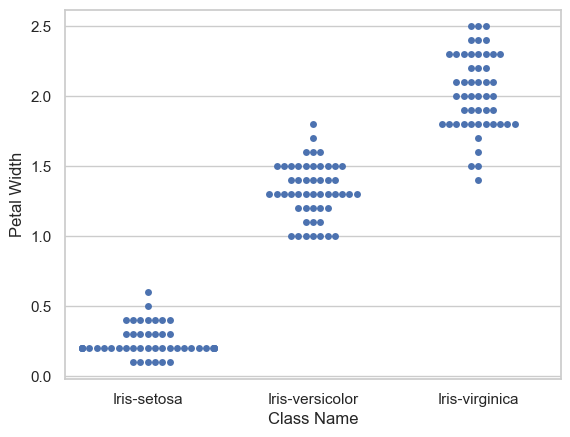

In [13]:
#  swarmplot
sb.set(style="whitegrid", color_codes=True)
ax = sb.swarmplot(x="Class Name", y="Petal Width", data=data)
plt.show()

In [14]:
x = data.drop('Class Name', axis=1)
y = data['Class Name']


In [15]:
x


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class Name, Length: 150, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=10)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


In [19]:
lr = Pipeline([('scaler1', StandardScaler()),
              ('lr_classifier', LogisticRegression())])
knn = Pipeline([('scaler2', StandardScaler()),
               ('knn_classifier', KNeighborsClassifier())])
sv = Pipeline([('scaler3', StandardScaler()), ('support_vector', SVC())])
dt = Pipeline([('decision_tree', DecisionTreeClassifier())])
rf = Pipeline([('rf_classifier', RandomForestClassifier(max_depth=3))])
gbc = Pipeline([('gbc_classifier', GradientBoostingClassifier())])


In [20]:
pipelines = [lr, knn, sv, dt, rf, gbc]


In [21]:
pipelines


[Pipeline(steps=[('scaler1', StandardScaler()),
                 ('lr_classifier', LogisticRegression())]),
 Pipeline(steps=[('scaler2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier())]),
 Pipeline(steps=[('scaler3', StandardScaler()), ('support_vector', SVC())]),
 Pipeline(steps=[('decision_tree', DecisionTreeClassifier())]),
 Pipeline(steps=[('rf_classifier', RandomForestClassifier(max_depth=3))]),
 Pipeline(steps=[('gbc_classifier', GradientBoostingClassifier())])]

In [22]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)


In [23]:
pipe_dict = {0: 'LR', 1: 'KNN', 2: 'SVC', 3: 'DT', 4: 'RF', 5: 'GBC'}


In [24]:
for i, model in enumerate(pipelines):
    print('{} Test Accuracy:{}'.format(
        pipe_dict[i], model.score(x_test, y_test)*100))


LR Test Accuracy:100.0
KNN Test Accuracy:96.66666666666667
SVC Test Accuracy:96.66666666666667
DT Test Accuracy:93.33333333333333
RF Test Accuracy:100.0
GBC Test Accuracy:100.0


In [25]:
model = LogisticRegression()


In [26]:
model.fit(x, y)


LogisticRegression()

In [27]:
new_data = pd.DataFrame({
    'Sepal Length': 12,
    'Sepal Width': 12,
    'Petal Length': 12,
    'Petal Width': 12
    }, index=[0])


In [28]:
p = model.predict(new_data)

In [29]:
print(f"According to the data of sepal and petal length & width the predicted Flower will be {p}")

According to the data of sepal and petal length & width the predicted Flower will be ['Iris-virginica']
